# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
# --- Pustaka Utama ---
import pandas as pd
import numpy as np
import joblib

# --- Visualisasi ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preprocessing ---
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# --- Modeling & Evaluasi ---
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# --- Pengaturan Tambahan ---
# Mengabaikan peringatan agar output lebih bersih
import warnings
warnings.filterwarnings('ignore')

# Mengatur agar semua kolom ditampilkan saat menggunakan head()
pd.set_option('display.max_columns', None)

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

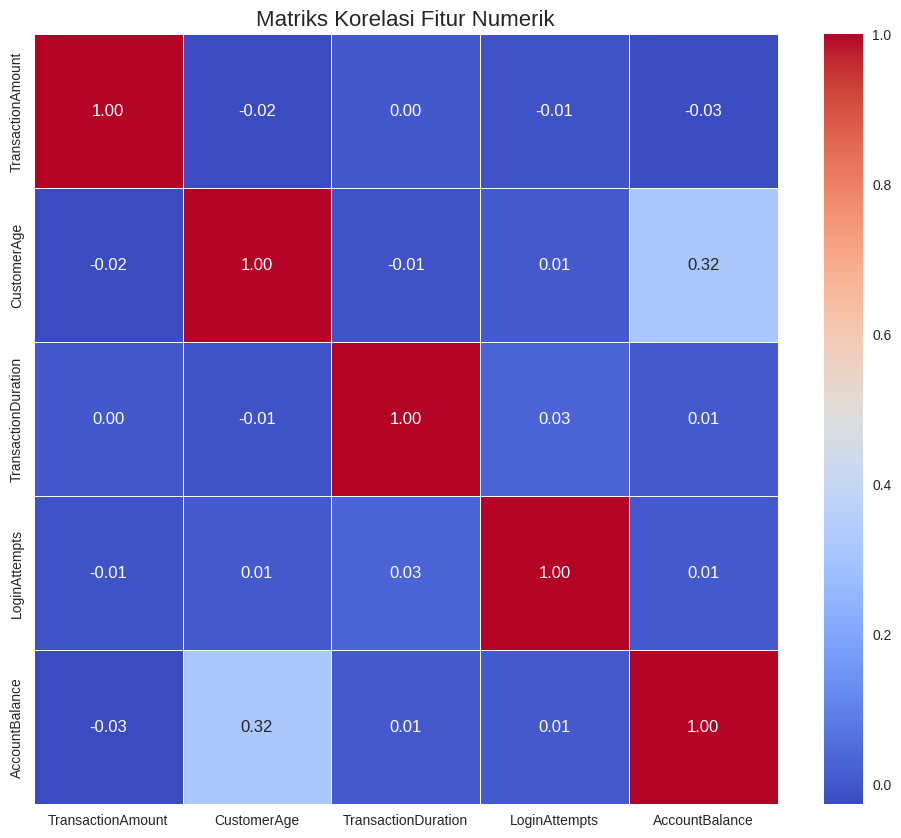

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Menghitung korelasi untuk fitur numerik
correlation_matrix = df.corr(numeric_only=True)

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)
plt.show()

Distribusi Fitur Numerik


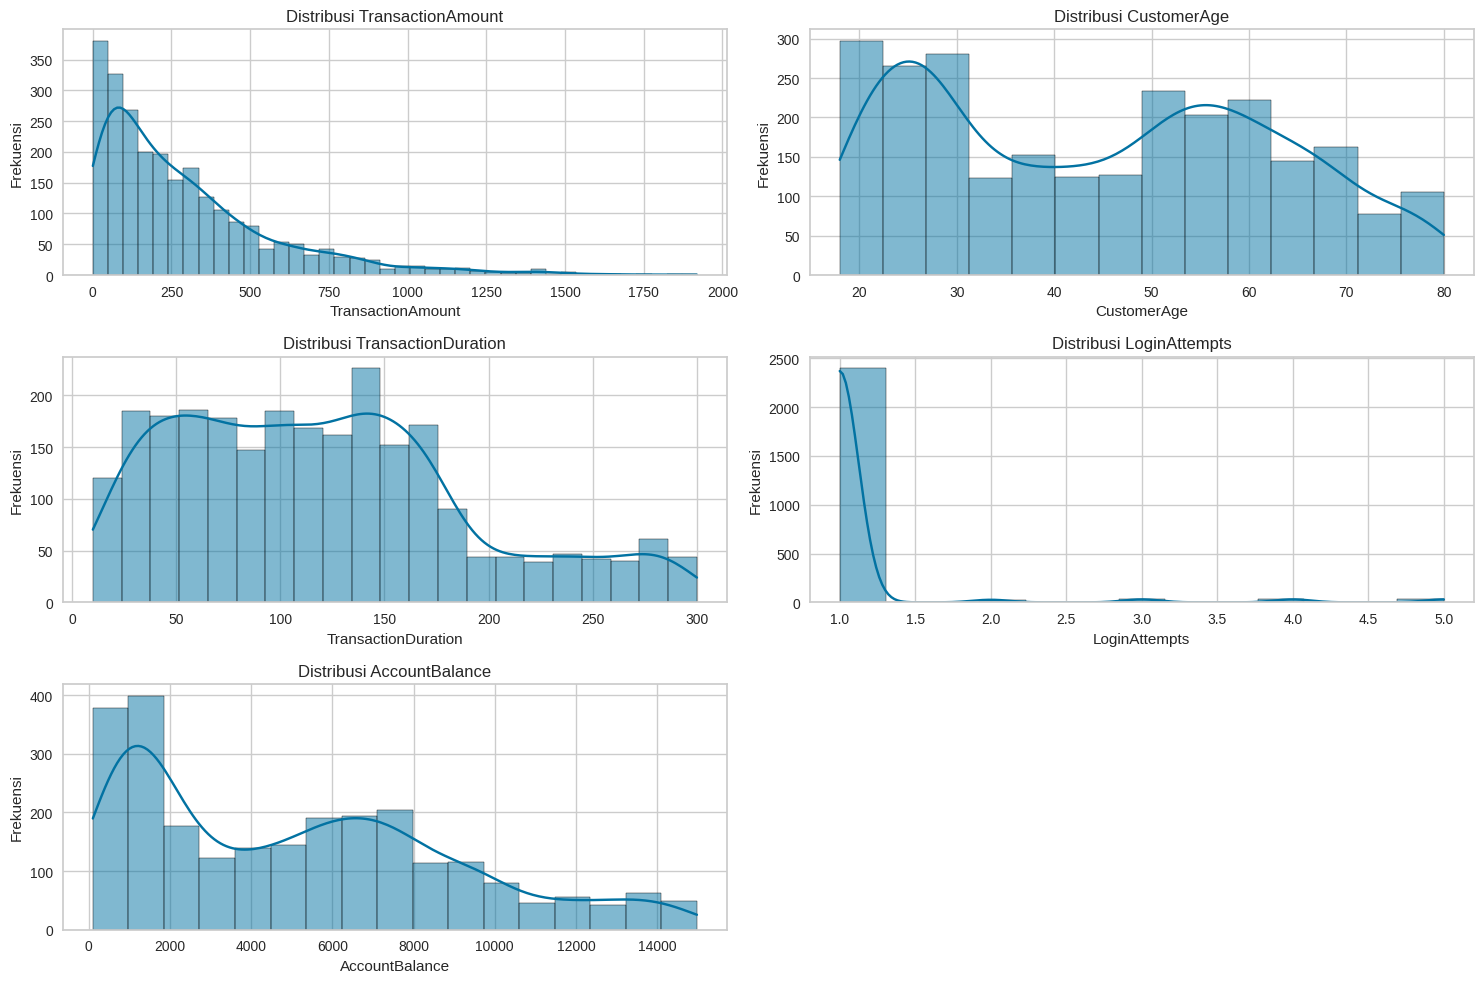


Distribusi Fitur Kategorikal


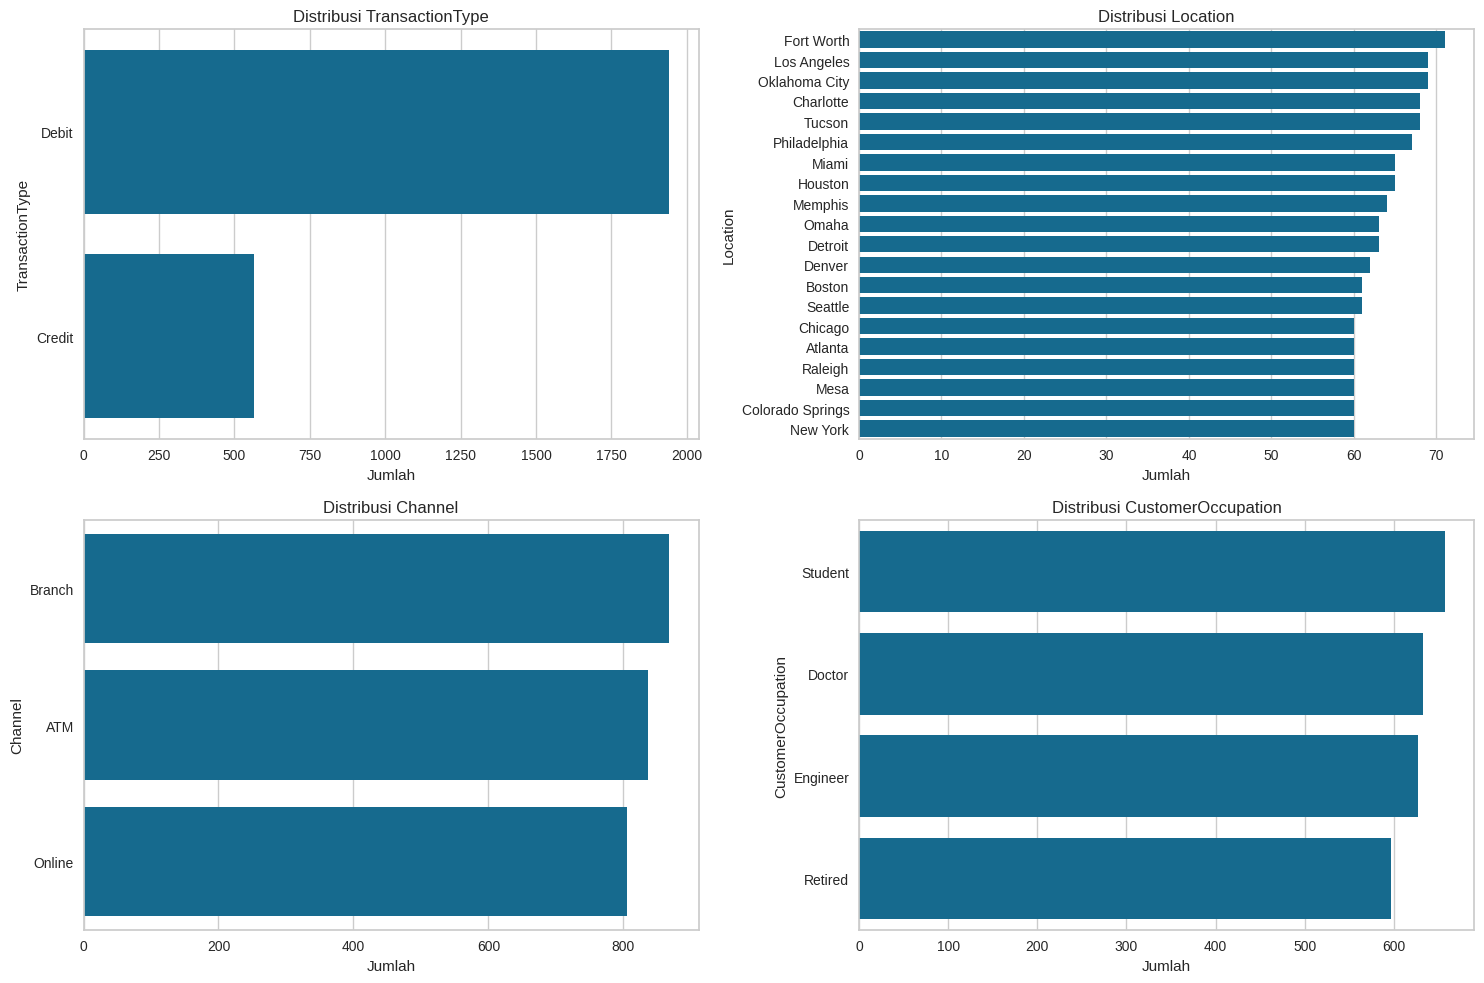

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# Memisahkan kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Visualisasi distribusi fitur numerik
print("Distribusi Fitur Numerik")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout() # Mencegah tumpang tindih
plt.show()


# Visualisasi distribusi fitur kategorikal (Top-N kategori)

# Ambil kolom kategorikal yang relevan
plotting_cols = [col for col in categorical_cols if col not in [
    'TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate'
]]

# Jumlah kolom yang akan diplot
num_plots = len(plotting_cols)

# Jumlah baris dan kolom untuk subplot
rows = (num_plots + 1) // 2  # 2 kolom per baris

print("\nDistribusi Fitur Kategorikal")
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(plotting_cols):
    plt.subplot(rows, 2, i + 1)

    # (Top 20) untuk fitur ini
    top_categories = df[col].value_counts().nlargest(20)

    # Plot hanya untuk kategori tersebut
    sns.barplot(y=top_categories.index, x=top_categories.values)

    plt.title(f'Distribusi {col}')
    plt.xlabel('Jumlah')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

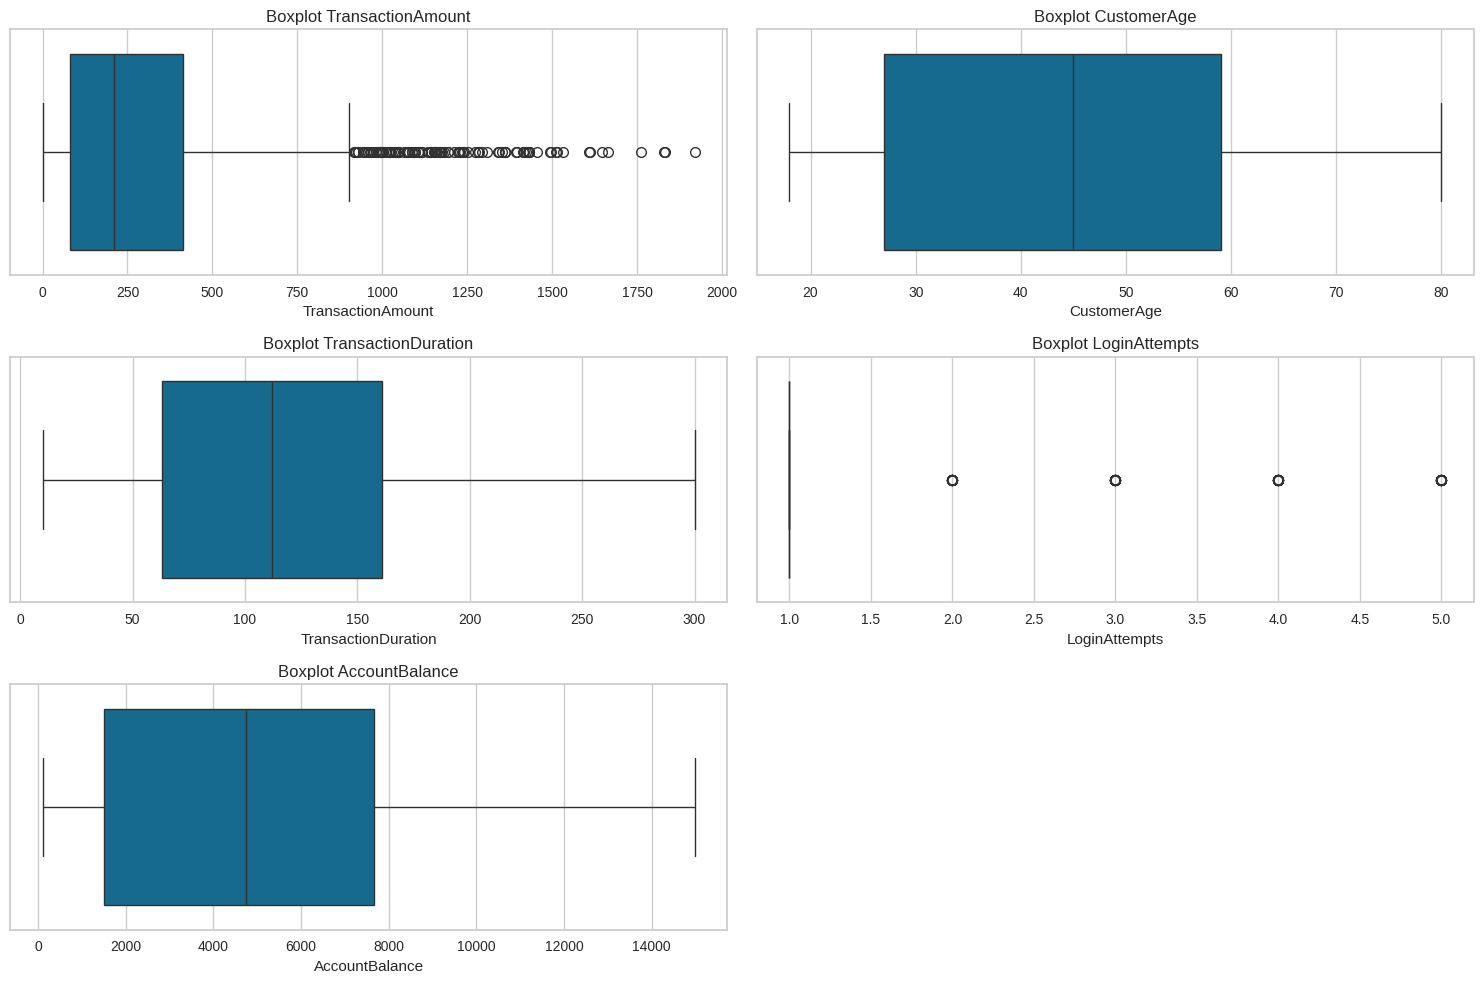

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# Boxplot untuk fitur numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# Identifikasi kolom numerik dari df
numerical_cols = df.select_dtypes(include=np.number).columns

# Scaling fitur numerik saja
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Fitur numerik setelah MinMax Scaling:")
df[numerical_cols].head()

Fitur numerik setelah MinMax Scaling:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,NaN,0.648276,0.0,0.492591


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
# Menghapus kolom yang tidak relevan (ID, IP, dll)
# Tanggal juga dihapus karena informasinya sudah direpresentasikan oleh fitur lain
cols_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate']
df_cleaned = df.drop(columns=cols_to_drop)

print("Kolom setelah penghapusan:")
print(df_cleaned.columns.tolist())
df_cleaned.head()

Kolom setelah penghapusan:
['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.


# Salin dataframe hasil pembersihan
df = df_cleaned.copy()

# Identifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Label encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Data setelah Label Encoding:")
df.head()

Data setelah Label Encoding:


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
#Cek Mapping label encoding

for col, le in label_encoders.items():
    print(f"\nMapping label encoding untuk kolom '{col}':")
    for i, class_ in enumerate(le.classes_):
        print(f"  {i} => {class_}")


Mapping label encoding untuk kolom 'TransactionType':
  0 => Credit
  1 => Debit
  2 => nan

Mapping label encoding untuk kolom 'Location':
  0 => Albuquerque
  1 => Atlanta
  2 => Austin
  3 => Baltimore
  4 => Boston
  5 => Charlotte
  6 => Chicago
  7 => Colorado Springs
  8 => Columbus
  9 => Dallas
  10 => Denver
  11 => Detroit
  12 => El Paso
  13 => Fort Worth
  14 => Fresno
  15 => Houston
  16 => Indianapolis
  17 => Jacksonville
  18 => Kansas City
  19 => Las Vegas
  20 => Los Angeles
  21 => Louisville
  22 => Memphis
  23 => Mesa
  24 => Miami
  25 => Milwaukee
  26 => Nashville
  27 => New York
  28 => Oklahoma City
  29 => Omaha
  30 => Philadelphia
  31 => Phoenix
  32 => Portland
  33 => Raleigh
  34 => Sacramento
  35 => San Antonio
  36 => San Diego
  37 => San Francisco
  38 => San Jose
  39 => Seattle
  40 => Tucson
  41 => Virginia Beach
  42 => Washington
  43 => nan

Mapping label encoding untuk kolom 'Channel':
  0 => ATM
  1 => Branch
  2 => Online
  3 => na

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.dropna(inplace=True)

# Hapus baris yang mengandung nilai encoded nan (misal angka paling tinggi di setiap kolom kategorikal)
for col in categorical_cols:
    max_encoded_value = df[col].max()
    # nilai max ini representasi nan, hapus baris dengan nilai tersebut
    df = df[df[col] != max_encoded_value]

# Reset index supaya rapi
df.reset_index(drop=True, inplace=True)

print("Missing values setelah pembersihan lanjutan:")
print(df.isnull().sum())

# Cek nilai unik lagi untuk memastikan
for col in categorical_cols:
    print(f"Unique values di '{col}': {df[col].unique()}")

Missing values setelah pembersihan lanjutan:
TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64
Unique values di 'TransactionType': [1 0]
Unique values di 'Location': [36 15 23 33 28 39 16 11 26  0 22 21 10  2  8 20 19  1 13 24 25  3 27 37
 35 30  5 40  6 34 18 29 41  9  4 17 12  7 14 32 42 31 38]
Unique values di 'Channel': [0 2 1]
Unique values di 'CustomerOccupation': [0 3 2 1]


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

df.drop_duplicates(inplace=True)

# Cek ulang untuk memastikan
print("\nDuplicated rows setelah penanganan:", df.duplicated().sum())


Duplicated rows setelah penanganan: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan nilai batas (capping)
df['TransactionAmount'] = np.where(df['TransactionAmount'] < lower_bound, lower_bound, df['TransactionAmount'])
df['TransactionAmount'] = np.where(df['TransactionAmount'] > upper_bound, upper_bound, df['TransactionAmount'])
print("Outlier pada 'TransactionAmount' sudah ditangani.\n")

Outlier pada 'TransactionAmount' sudah ditangani.



In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# --- Binning Data untuk 'CustomerAge' ---
# Membuat kategori usia
age_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0] # Rentang dalam skala MinMax
age_labels = ['Muda', 'Dewasa_Muda', 'Dewasa', 'Paruh_Baya', 'Lansia']
df['AgeCategory'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels, include_lowest=True)

# Melakukan Label Encoding pada hasil binning
le_age = LabelEncoder()
df['AgeCategoryEncoded'] = le_age.fit_transform(df['AgeCategory'])

# Hapus kolom binning kategorikal asli dan CustomerAge asli
df.drop(['CustomerAge', 'AgeCategory'], axis=1, inplace=True)

print("Binning pada 'CustomerAge' dan encoding selesai.")
df.head()

Binning pada 'CustomerAge' dan encoding selesai.


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeCategoryEncoded
0,0.007207,1,36,0,0,0.244828,0.0,0.336832,2
1,0.195940,1,15,0,0,0.451724,0.0,0.918055,2
2,0.065680,1,23,2,3,0.158621,0.0,0.068637,3
3,0.096016,1,33,2,3,0.051724,0.0,0.569198,3
4,0.047888,1,28,0,3,0.558621,0.0,0.045738,3


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeCategoryEncoded
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,0.148522,0.774672,21.149345,0.986463,1.513537,0.378488,0.029913,0.335163,2.175983
std,0.131028,0.417889,12.265644,0.808047,1.134487,0.243907,0.146424,0.262581,1.439334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000064,0.000000
25%,0.042408,1.000000,11.000000,0.000000,0.000000,0.182759,0.000000,0.092976,1.000000
50%,0.111007,1.000000,21.000000,1.000000,2.000000,0.351724,0.000000,0.306320,3.000000
75%,0.215513,1.000000,31.750000,2.000000,3.000000,0.524138,0.000000,0.508083,3.000000
max,0.475171,1.000000,42.000000,2.000000,3.000000,1.000000,1.000000,1.000000,4.000000


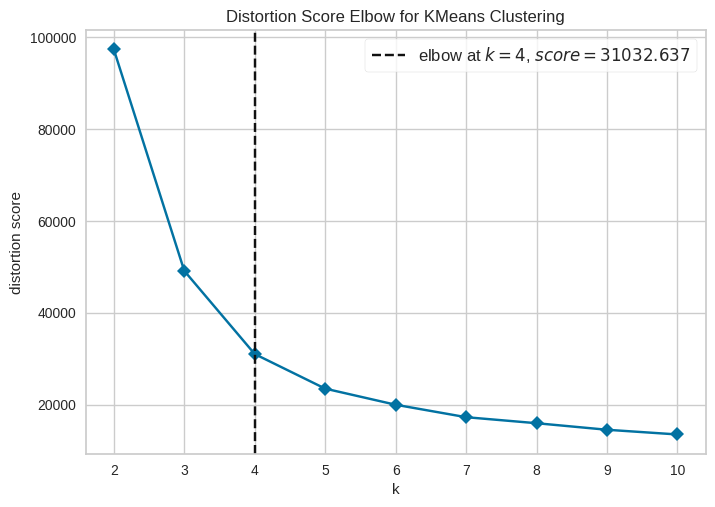

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=False)

visualizer.fit(df)
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering

# Menggunakan jumlah cluster yang didapat dari Elbow Method
k_optimal = visualizer.elbow_value_
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(df)

# Menambahkan label cluster ke DataFrame
df['Cluster'] = kmeans.labels_

print(f"Model K-Means dengan {k_optimal} cluster berhasil dibuat.")
df.head()

Model K-Means dengan 4 cluster berhasil dibuat.


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeCategoryEncoded,Cluster
0,0.007207,1,36,0,0,0.244828,0.0,0.336832,2,3
1,0.195940,1,15,0,0,0.451724,0.0,0.918055,2,0
2,0.065680,1,23,2,3,0.158621,0.0,0.068637,3,1
3,0.096016,1,33,2,3,0.051724,0.0,0.569198,3,3
4,0.047888,1,28,0,3,0.558621,0.0,0.045738,3,1


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

# Menghitung Silhouette Score
score = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.4799


In [ ]:
# Membuat visualisasi hasil clustering


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)


# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
pca_data = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.

k_pca_optimal = 4
kmeans_pca = KMeans(n_clusters=k_pca_optimal, random_state=42, n_init=10)
kmeans_pca.fit(pca_data)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.

# Menampilkan analisis deskriptif untuk setiap cluster

cluster_analysis = df.groupby('Cluster').agg(['mean', 'min', 'max'])


# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# kolom kategorikal yang ingin dianalisis
categorical_cols = ['Location', 'TransactionType', 'Channel', 'CustomerOccupation']

# agregasi modus pada kolom-kolom tersebut
modus_analysis = df.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0])


# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
print("Analisis deskriptif per cluster (encoded dan scaled):")
print(cluster_analysis)
print("\nAnalisis Modus untuk Fitur Kategorikal per Cluster:")
print(modus_analysis)

# mapping label encoding
for col, le in label_encoders.items():
    print(f"\nMapping label encoding untuk kolom '{col}':")

    # Ambil nilai unik encoded di df untuk kolom ini
    unique_encoded_values = sorted(df[col].unique())

    # Mapping hanya kelas yang ada di data
    for encoded_val in unique_encoded_values:
        # Cari label asli sesuai encoded value
        original_label = le.inverse_transform([encoded_val])[0]
        print(f"  {encoded_val} => {original_label}")


Analisis deskriptif per cluster (encoded dan scaled):
        TransactionAmount                     TransactionType          \
                     mean       min       max            mean min max   
Cluster                                                                 
0                0.151046  0.000099  0.475171        0.780776   0   1   
1                0.147820  0.000000  0.475171        0.768456   0   1   
2                0.145719  0.000031  0.475171        0.789753   0   1   
3                0.149469  0.000599  0.475171        0.758879   0   1   

          Location           Channel         CustomerOccupation          \
              mean min max      mean min max               mean min max   
Cluster                                                                   
0        15.996627  11  21  0.981450   0   2           1.409781   0   3   
1        26.827181  22  32  0.956376   0   2           1.604027   0   3   
2         5.118375   0  10  0.998233   0   2           1.56

#### 1.  **Cluster 0: Nasabah Profesional Bernilai Tinggi & Konvensional**

* `Location`: Modus (paling banyak) di **Fort Worth**, dengan rentang anggota dari **Detroit** hingga **Louisville**.
* `CustomerOccupation`: Modus (paling dominan) adalah **Dokter (Doctor)**.
* `TransactionType`: Rata-rata 0.781, artinya **78.1%** transaksi adalah **Debit**.
* `Channel`: Rata-rata 0.981, menunjukkan preferensi yang sangat kuat untuk bertransaksi di **Cabang (Branch)**.
* `TransactionAmount`: Rata-rata **tertinggi** (0.151) di antara semua cluster.
* `AccountBalance`: Rata-rata **tertinggi** (0.341) di antara semua cluster.
* `LoginAttempts`: Rata-rata **tertinggi** (0.038) di antara semua cluster.

* **Analisis & Rekomendasi:**
Cluster ini terdiri dari nasabah dengan `CustomerOccupation` dominan Dokter yang terkonsentrasi di wilayah Fort Worth dan sekitarnya. Mereka adalah pengguna setia layanan perbankan konvensional, terbukti dari preferensi kuat terhadap `Channel` transaksi melalui cabang (Branch). Kelompok ini memiliki `TransactionAmount` dan `AccountBalance` rata-rata tertinggi, yang menunjukkan bahwa mereka adalah nasabah yang paling bernilai (high-value). Tingginya `LoginAttempts`, meskipun tertinggi, mungkin menandakan baru mulai beradaptasi dengan platform digital atau bisa juga diabaikan jika nilai absolutnya kecil. **Rekomendasi:** Tawarkan produk premium seperti layanan prioritas, *wealth management*, atau *relationship manager* pribadi yang dapat diakses melalui cabang. Promosi produk investasi atau pinjaman dengan limit tinggi juga relevan untuk segmen ini.

---

#### 2. **Cluster 1: Mahasiswa/Nasabah Muda yang Loyal pada ATM**

* `Location`: Modus di **Oklahoma City**, dengan sebaran anggota dari **Memphis** hingga **Portland**.
* `CustomerOccupation`: Modus adalah **Mahasiswa (Student)**.
* `TransactionType`: Rata-rata 0.768, artinya **76.8%** transaksi adalah **Debit**.
* `Channel`: Modus adalah **ATM** (kode 0).
    *(Catatan Penting: Terdapat inkonsistensi data antara modus (0 => ATM) dan mean (0.956, mendekati 1 => Branch) untuk fitur `Channel`. Analisis ini menggunakan modus, yang merupakan ukuran yang lebih tepat. Hal ini perlu divalidasi ulang).*
* `AccountBalance`: Rata-rata **terendah** (0.330).
* `AgeCategoryEncoded`: Rata-rata tertinggi (2.22), mengindikasikan **kelompok usia senior**.
    *(Catatan Penting: Terdapat kontradiksi signifikan antara `CustomerOccupation` (Mahasiswa) dan `AgeCategoryEncoded` (Senior). Ini bisa jadi karena anomali data atau segmen yang sangat unik seperti mahasiswa pascasarjana di usia matang).*

* **Analisis & Rekomendasi:**
Cluster ini menunjukkan profil yang paling ambigu dan memerlukan investigasi data lebih lanjut. Berdasarkan modus, `CustomerOccupation` mereka adalah **Mahasiswa** yang terkonsentrasi di Oklahoma City dan sangat bergantung pada `Channel` **ATM** untuk bertransaksi. Mereka memiliki `AccountBalance` rata-rata terendah. Namun, data `AgeCategoryEncoded` mereka justru menunjukkan kategori senior. Jika kita mengasumsikan label 'Mahasiswa' benar, mereka adalah segmen nasabah muda dengan kebutuhan perbankan dasar **Rekomendasi**: Tawarkan produk perbankan dasar bebas biaya, rekening tabungan untuk pemula, dan promosi yang terikat dengan kartu debit untuk penggunaan di merchant. Edukasi mengenai penggunaan perbankan digital (Online) dapat membantu mengurangi ketergantungan pada `Channel` ATM.

---

#### 3. **Cluster 2: Nasabah Hemat Pengguna Cabang**

* `Location`: Modus di **Charlotte**, dengan sebaran anggota dari **Albuquerque** hingga **Denver**.
* `CustomerOccupation`: Modus adalah **Mahasiswa (Student)**.
* `TransactionType`: Rata-rata 0.790, proporsi transaksi **Debit** tertinggi **(79%)** di antara semua cluster.
* `Channel`: Rata-rata 0.998, menunjukkan mereka **hampir secara eksklusif** menggunakan **Cabang (Branch)**.
* `TransactionAmount`: Rata-rata **terendah** (0.145) di antara semua cluster.
* `TransactionDuration`: Rata-rata standar (0.375), tidak menonjol.

* **Analisis & Rekomendasi:**
Cluster ini terdiri dari nasabah (dominan `CustomerOccupation` Mahasiswa) yang konservatif dalam pengeluaran dan cara bertransaksi. Meskipun mungkin muda, mereka sangat bergantung pada `Channel` layanan tatap muka di cabang, mirip dengan nasabah generasi yang lebih tua. `TransactionAmount` mereka yang paling rendah menandakan mereka adalah segmen yang "hemat" atau menggunakan akun untuk transaksi bernominal kecil.**Rekomendasi**: Libatkan segmen ini melalui program literasi keuangan yang diadakan di cabang. Tawarkan produk tabungan berjangka dengan setoran awal yang rendah atau program "menabung dulu, belanja kemudian" untuk mendorong peningkatan `AccountBalance` dan `TransactionAmount`.

---

#### 4. **Cluster 3: Profesional Senior yang Efisien & Mandiri**

* `Location`: Modus di **Tucson**, dengan sebaran anggota dari **Raleigh** hingga **Washington**.
* `CustomerOccupation`: Modus adalah **Dokter (Doctor)**.
* `TransactionType`: Rata-rata 0.759, proporsi transaksi **Debit** terendah **(75.9%)**, artinya mereka sedikit lebih sering menggunakan transaksi **Credit** dibanding cluster lain.
* `Channel`: Rata-rata 1.013, sangat dominan menggunakan **Cabang (Branch)**.
* `TransactionDuration`: Rata-rata **tercepat** (0.367).
* `LoginAttempts`: Rata-rata **paling sedikit** (0.024).
* `AgeCategoryEncoded`: Rata-rata tertinggi (2.22), mengindikasikan **kelompok usia senior**.

* **Analisis & Rekomendasi:**
Cluster ini adalah segmen nasabah `AgeCategoryEncoded` senior yang sangat mapan (`CustomerOccupation` dominan Dokter) dan efisien. Mereka menyelesaikan transaksi dengan `TransactionDuration` sangat cepat dan jarang mengalami masalah akses (`LoginAttempts` terendah), menandakan mereka sangat paham dengan proses perbankan meskipun preferensi utama `Channel` mereka adalah cabang. Mereka mandiri dan tidak membuang waktu. **Rekomendasi**: Hargai waktu mereka dengan menawarkan layanan jalur cepat (*fast lane*) di cabang. Kenalkan layanan *omnichannel* seperti kemampuan membuat janji temu dengan staf cabang melalui platform online. Mengingat profil profesional dan efisiensi mereka, produk investasi atau asuransi yang kompleks namun dengan penjelasan yang ringkas dan jelas bisa jadi menarik bagi mereka.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

df.rename(columns={'Cluster': 'Target'}, inplace=True)
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeCategoryEncoded,Target
0,0.007207,1,36,0,0,0.244828,0.0,0.336832,2,3
1,0.195940,1,15,0,0,0.451724,0.0,0.918055,2,0
2,0.065680,1,23,2,3,0.158621,0.0,0.068637,3,1
3,0.096016,1,33,2,3,0.051724,0.0,0.569198,3,3
4,0.047888,1,28,0,3,0.558621,0.0,0.045738,3,1


In [ ]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

End of Code.